In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 4.8MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=6d85600500249a4d5f7416fec46a920d44fbbe543efe0b57456ebcc93c483a78
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 4.6MB/s 
     |████████████████████████████████| 983kB 5.2MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=f369eae32e43bd659adc17aa90b645bcc7eb83fe3da91a9785ad4494bacd9413
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [6]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [7]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [8]:
df = pd.read_json('pretty_ms_tweets_feedback.json')
#df_sample = pd.read_csv('TwitterData.csv')



In [9]:
#Sentiment Analysis
#Vader Sentiment

In [10]:
analyzer = SentimentIntensityAnalyzer()

In [11]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [12]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [13]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [14]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

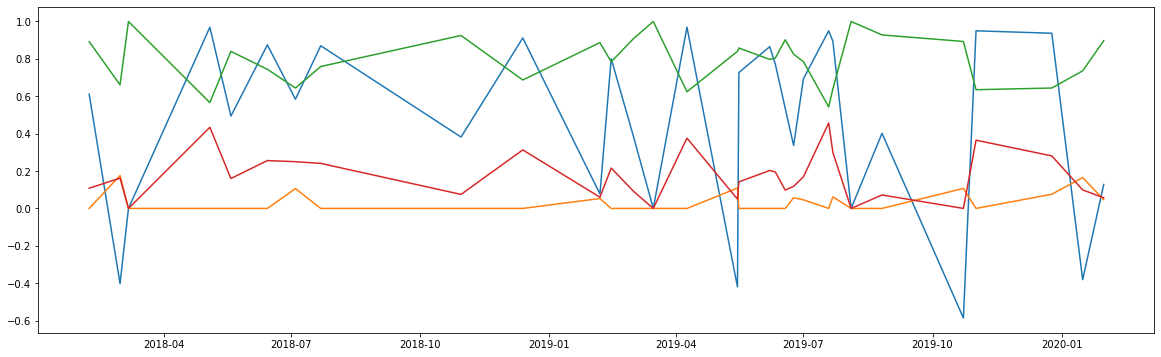

In [15]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [16]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'"Learn to ask for feedback. You can\'t grow without it" -@rhondajoy5\n@MorganStanley & @ShearmanLaw & @MBBANYC\'s launch of the Little Black Book of Success: Laws of #Leadership for Black Women WorkBook Launch! @BlkBookSuccess #LBBOSpic.twitter.com/vcprBWbPlA'

In [17]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'Fantastic @InvestingTalent careers event for disabled students interested in a career in Investment Banking last week. Really engaging with lots of positive feedback. Huge thanks to host @HSBC_UK  and participating banks @joinusbarclays @MorganStanley @jpmorgan @UBS & @GSCareerspic.twitter.com/AkInm9Olfk'

Text(0, 0.5, 'Sentiment')

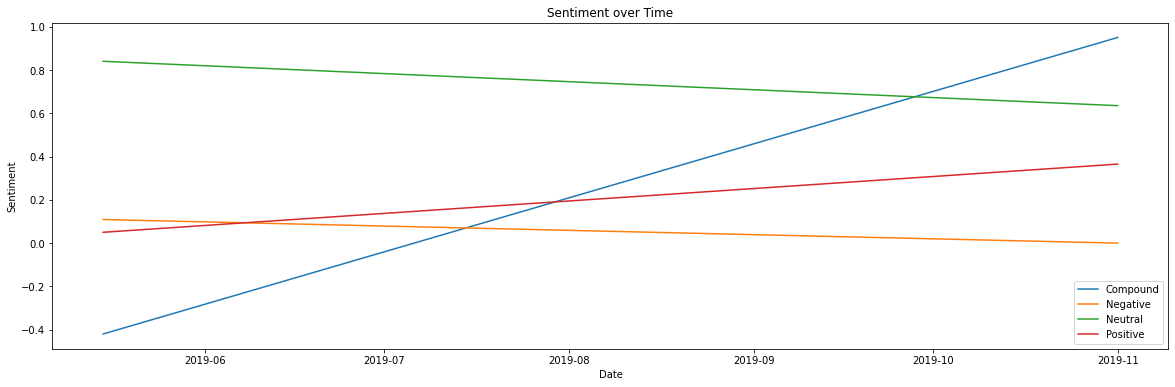

In [18]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

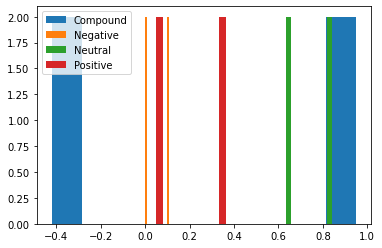

In [19]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

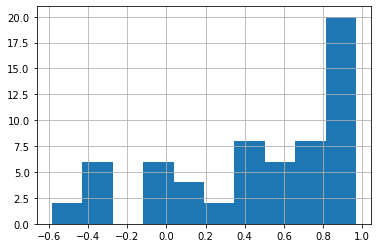

In [20]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [21]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.892,0.108,0.6114
1,0.892,0.108,0.6114
2,0.925,0.075,0.3818
3,0.925,0.075,0.3818
4,0.887,0.060,0.0772
...,...,...,...
57,0.640,0.299,0.8943
58,0.543,0.457,0.9501
59,0.785,0.169,0.6932
60,0.825,0.118,0.3367


In [22]:
#Importing Various twitter data
# all JP files

#Feedback
df = pd.read_json('pretty_ms_tweets_feedback.json')


In [23]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 4.4MB/s 
     |████████████████████████████████| 552kB 34.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=a040b28e229e7acbac109e14aab10cf1935e4431fbb40196b973af239e7ba60d
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=b10a67d9bcf8b314c00ef16c31a7668a3f8138195f5e65c6da13c76333759a07
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [24]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [25]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(62, 3)


In [26]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [27]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [28]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [29]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,True,"[Leadership, LBBOSpic]",[https://pbs.twimg.com/media/DVZHktJW0AA14lD.jpg],False,False,1,[],,0,[],0,MBBANYC,"""Learn to ask for feedback. You can't grow wit...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-02-07 00:30:03,2018-02-07 00:30:03,961034284105654272,/MBBANYC/status/961034284105654273,167403678,MBBA of NYC,,0.000,0.892,0.108,0.6114
1,True,"[Leadership, LBBOSpic]",[https://pbs.twimg.com/media/DVZHktJW0AA14lD.jpg],False,False,1,[],,0,[],0,MBBANYC,"""Learn to ask for feedback. You can't grow wit...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-02-07 00:30:03,2018-02-07 00:30:03,961034284105654272,/MBBANYC/status/961034284105654273,167403678,MBBA of NYC,,0.000,0.892,0.108,0.6114
2,True,"[China, Economy, Copper, IronOre]",[https://pbs.twimg.com/media/Dqw8J-tWsAgnTF-.jpg],False,False,4,[],,0,[],1,Fongern_FX,It's becoming clear after investor feedback an...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-10-30 15:07:15,2018-10-30 15:07:15,1057287823366217728,/Fongern_FX/status/1057287823366217728,759774170536251392,Marc-André Fongern,,0.000,0.925,0.075,0.3818
3,True,"[China, Economy, Copper, IronOre]",[https://pbs.twimg.com/media/Dqw8J-tWsAgnTF-.jpg],False,False,4,[],,0,[],1,Fongern_FX,It's becoming clear after investor feedback an...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-10-30 15:07:15,2018-10-30 15:07:15,1057287823366217728,/Fongern_FX/status/1057287823366217728,759774170536251392,Marc-André Fongern,,0.000,0.925,0.075,0.3818
4,False,[RS],[],False,True,0,[],1092971071538688000,0,"[{'screen_name': 'nistula', 'user_id': '161634...",0,CoolDungBeetle,@MorganStanley \n\nPrivate sector in India mea...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-02-06 14:34:02,2019-02-06 14:34:02,1093155863206912000,/CoolDungBeetle/status/1093155863206912000,129056223,🤣🤣🎓🎓🎓University of Dung Beetles!🎓🎓🎓🤣🤣,,0.053,0.887,0.060,0.0772


In [30]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [31]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
4      0.233704+0.000000j -0.115712+0.000000j       1        1  30.234311
7     -0.374263+0.000000j  0.019498+0.000000j       2        1  25.728042
5      0.218811+0.000000j  0.153987+0.000000j       3        1  12.250325
9     -0.011179+0.000000j -0.008253+0.000000j       4        1   4.541046
8     -0.011179+0.000000j -0.008253+0.000000j       5        1   4.541046
6     -0.011179+0.000000j -0.008253+0.000000j       6        1   4.541046
3     -0.011179+0.000000j -0.008253+0.000000j       7        1   4.541046
2     -0.011179+0.000000j -0.008253+0.000000j       8        1   4.541046
1     -0.011179+0.000000j -0.008253+0.000000j       9        1   4.541046
0     -0.011179+0.000000j -0.008253+0.000000j      10        1   4.541046, topic_info=         Term      Freq     Total Category  logprob  loglift
0       

In [32]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


ValueError: ignored

In [33]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


ValueError: ignored

In [34]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(48, 25)
(8, 25)
(6, 25)
